<a href="https://colab.research.google.com/github/RodrigoEduard/08MBID---Visualizacion-de-Datos/blob/main/TrabajoPracticoVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data2015 = pd.read_excel('/content/drive/MyDrive/Datos_VD/data2015.xlsx')
data2016 = pd.read_excel('/content/drive/MyDrive/Datos_VD/data2016.xlsx')
data2017 = pd.read_excel('/content/drive/MyDrive/Datos_VD/data2017.xlsx')
data2018 = pd.read_excel('/content/drive/MyDrive/Datos_VD/data2018.xlsx')
data2019 = pd.read_excel('/content/drive/MyDrive/Datos_VD/data2019.xlsx')
data2020 = pd.read_excel('/content/drive/MyDrive/Datos_VD/data2020.xlsx')
data2021 = pd.read_excel('/content/drive/MyDrive/Datos_VD/data2021.xlsx')
data2022 = pd.read_excel('/content/drive/MyDrive/Datos_VD/data2022.xlsx')
conduccion_V2 = pd.read_excel('/content/drive/MyDrive/R/conduccion_V2.xlsx')
REG_PROV_COM = pd.read_excel('/content/drive/MyDrive/Datos_VD/REG_PROV_COM.xlsx')

In [24]:
data2021['MATERIA'] = data2021['MATERIA '].str.strip()

In [37]:
REG_PROV_COM = pd.read_excel('/content/drive/MyDrive/Datos_VD/REG_PROV_COM.xlsx')

In [36]:
print(data2022.shape)
data2022.head()

(550473, 17)


,ID_CAUSA,CÓDIGO CORTE,CORTE,CÓDIGO TRIBUNAL,TRIBUNAL,RUC,RIT,TIPO CAUSA,COD. MATERIA,MATERIA,FECHA INGRESO,MES INGRESO,AÑO INGRESO,TOTAL INGRESOS POR MATERIAS,FORMA INICIO,TIPO INGRESO,SISTEMA
0,12554173,10,C.A. DE ARICA.,988,TRIBUNAL DE JUICIO ORAL EN LO PENAL DE ARICA.,2100050201-1,1-1-2022,ORDINARIA,14021,MARCHARSE DEL SITIO DEL SUCESO SIN PRESTAR AUX...,2022-01-03,2022-01-01,2022,1,AUTO DE APERTURA,MANUAL,SIAGJ
1,12554173,10,C.A. DE ARICA.,988,TRIBUNAL DE JUICIO ORAL EN LO PENAL DE ARICA.,2100050201-1,1-1-2022,ORDINARIA,14006,CONDUCCIÓN ESTADO DE EBRIEDAD CON RESULTADO DE...,2022-01-03,2022-01-01,2022,1,AUTO DE APERTURA,MANUAL,SIAGJ
2,12554173,10,C.A. DE ARICA.,988,TRIBUNAL DE JUICIO ORAL EN LO PENAL DE ARICA.,2100050201-1,1-1-2022,ORDINARIA,14052,CONDUCCIÓN ESTADO DE EBRIEDAD CON O SIN DAÑOS ...,2022-01-03,2022-01-01,2022,1,AUTO DE APERTURA,MANUAL,SIAGJ
3,12554173,10,C.A. DE ARICA.,988,TRIBUNAL DE JUICIO ORAL EN LO PENAL DE ARICA.,2100050201-1,1-1-2022,ORDINARIA,14007,CONDUCCIÓN ESTADO DE EBRIEDAD CON RESULTADO DE...,2022-01-03,2022-01-01,2022,1,AUTO DE APERTURA,MANUAL,SIAGJ
4,12557435,10,C.A. DE ARICA.,988,TRIBUNAL DE JUICIO ORAL EN LO PENAL DE ARICA.,2000385771-K,1-2-2022,ORDINARIA,802,ROBO CON INTIMIDACION ART. 433,2022-01-04,2022-01-01,2022,1,AUTO DE APERTURA,MANUAL,SIAGJ


In [38]:
print(REG_PROV_COM.shape)
REG_PROV_COM.head()

(349, 4)


,"CÓDIGOS y NOMBRES DE COMUNAS, PROVINCIAS, REGIONES Y SERVICIOS DE SALUD",Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Código Comuna hasta 1999,Nombre Comuna,Provincia desde 2018,Nombre Región desde 2018
1,201,Arica,Arica,De Arica y Parinacota
2,202,Camarones,Arica,De Arica y Parinacota
3,205,Putre,Parinacota,De Arica y Parinacota
4,206,General Lagos,Parinacota,De Arica y Parinacota


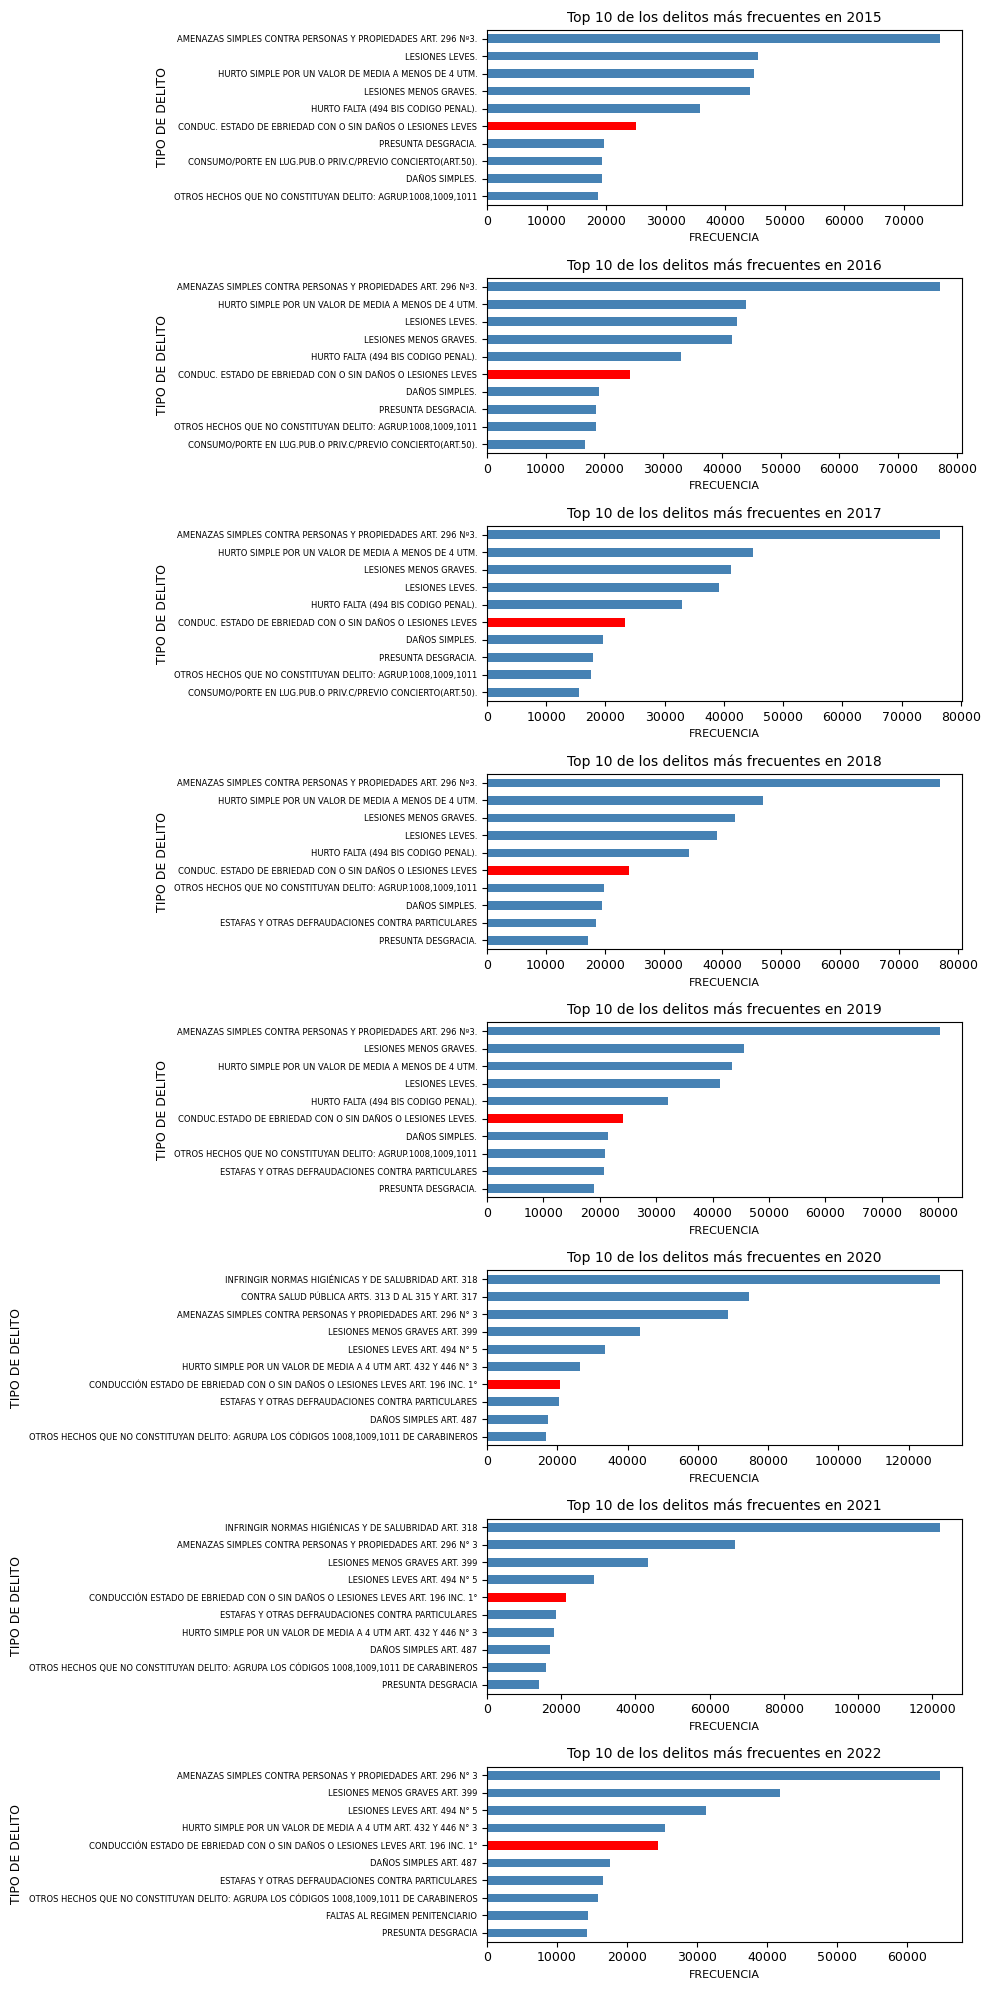

In [35]:
import matplotlib.pyplot as plt
dataframes = [data2015, data2016, data2017, data2018, data2019, data2020, data2021, data2022]
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

plt.figure(figsize=(10,20))
for i, (df, year) in enumerate(zip(dataframes, years)):
    top10 = df['MATERIA'].value_counts().nlargest(10)
    colors = ['red' if 'EBRIEDAD' in idx else 'steelblue' for idx in top10.index]
    plt.subplot(8, 1, i+1)
    top10.plot(kind='barh', color=colors)

    plt.xlabel('FRECUENCIA', fontsize=8)
    plt.ylabel('TIPO DE DELITO', fontsize=9)
    plt.title('Top 10 de los delitos más frecuentes en ' + str(year), fontsize=10)
    plt.gca().invert_yaxis()

    plt.yticks(fontsize=6)
    plt.xticks(fontsize=9)

plt.tight_layout()
plt.show()

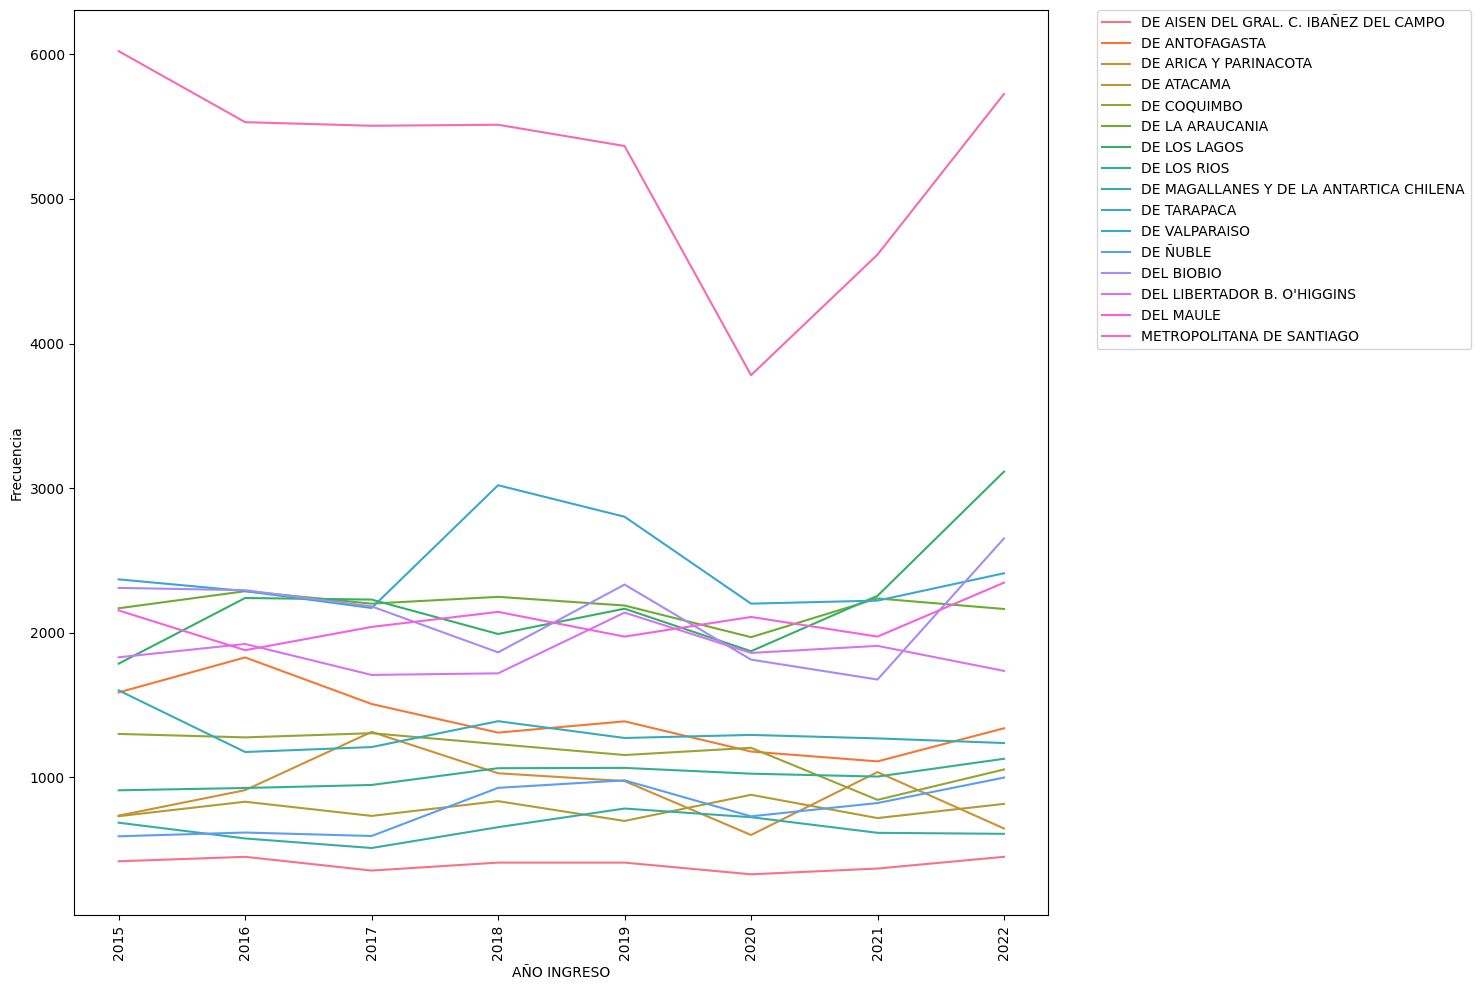

In [ ]:
table_reg_year = pd.crosstab(index=conduccion_V2['NOMBRE REGION'], columns=conduccion_V2['AÑO INGRESO'])
df = table_reg_year.reset_index()
df_melt = df.melt(id_vars='NOMBRE REGION', var_name='AÑO INGRESO', value_name='Frecuencia')
# Crear el gráfico
plt.figure(figsize=(15, 10))
sns.lineplot(data=df_melt, x='AÑO INGRESO', y='Frecuencia', hue='NOMBRE REGION')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

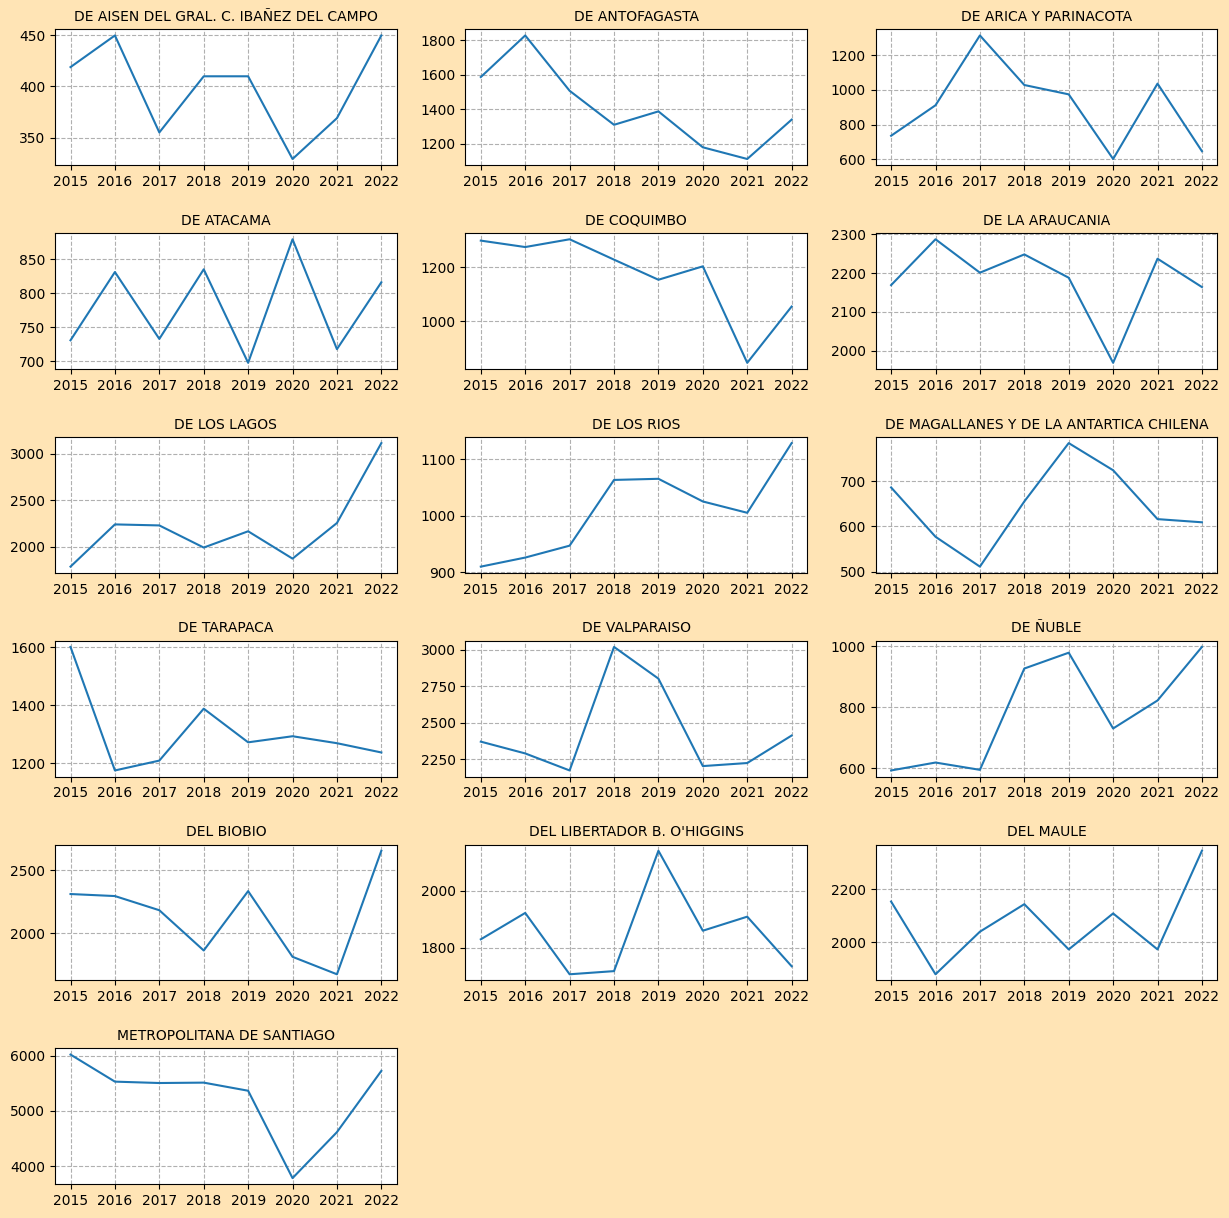

In [ ]:
table_reg_year = pd.crosstab(index=conduccion_V2['NOMBRE REGION'], columns=conduccion_V2['AÑO INGRESO'])
df = table_reg_year.reset_index()

df_melt = df.melt(id_vars='NOMBRE REGION', var_name='AÑO INGRESO', value_name='Freq')
fig, axs = plt.subplots((len(df_melt['NOMBRE REGION'].unique()) + 2) // 3, 3, figsize=(15, 15))
plt.subplots_adjust(hspace = 0.5)
for (region, group), ax in zip(df_melt.groupby('NOMBRE REGION'), axs.flatten()):
    group.plot(x='AÑO INGRESO', y='Freq', ax=ax, legend=False)
    ax.set_title(region, fontsize=10)
    ax.set_xlabel('')
    ax.grid(True, linestyle='--')
for ax in axs.flatten()[len(df_melt['NOMBRE REGION'].unique()):]:
    fig.delaxes(ax)
fig.patch.set_facecolor('moccasin')

plt.show()
